In [79]:
from astropy.io import fits
import os
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
import ccdproc as ccd
import numpy as np
from astropy.stats import mad_std
from astropy.nddata import CCDData
plt.style.use(astropy_mpl_style)

# Select photos from which day are to be processed
# 0 -> 20160212
# 1 -> 20160213
i = 0
display_combined_flat_filters = False
display_combined_bias = False




data_folder = os.path.join(os.getcwd(), 'Source Data')
files = []
for dir in os.listdir(data_folder):
    files.append(ccd.ImageFileCollection(os.path.join(data_folder, dir)))



In [80]:
# Combining Bias Images


path = 'combined_'+str(i)
if not os.path.exists('combined_'+str(i)):
    os.makedirs('combined_'+str(i))

path = os.path.join(os.getcwd(), path)

summary = files[i].summary
bias_files = []
for file in summary['file'].astype(str):
    if 'bias' in file:
        bias_files.append(CCDData.read(os.path.join(files[i].location, file), unit='adu'))



combined_bias = ccd.combine(bias_files,
                            method = 'average',
                            sigma_clip=True, sigma_clip_low_thres=5, sigma_clip_high_thres=5,
                            sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std)

combined_bias.meta['combined'] = True
combined_bias.write(os.path.join(path, 'combined_bias.fit'), overwrite=True)


if display_combined_bias:
    plt.grid(False)
    plt.imshow(combined_bias, cmap='gray')
    plt.colorbar()
    plt.title('Combined Bias')
    plt.show()

In [81]:
#Combining Flat Files categorising according to the filters


filters = {}
for file in summary['file'].astype(str):
    if 'flat' in file:
        filter = file.split("_")[1][0]
        if filter not in filters:
            filters[filter] = []
        filters[filter].append(os.path.join(files[i].location, file))


for (filter, paths) in filters.items():
    flat_filter_files = []
    for path2 in paths:
        flat_filter_files.append(CCDData.read(path2, unit='adu'))
    combined_flat = ccd.combine(flat_filter_files,
                                method='average', scale= lambda x: 1/np.median(x),
                                sigma_clip=True, sigma_clip_low_thresh=5, sigma_clip_high_thresh=5,
                                sigma_clip_func=np.ma.median, signma_clip_dev_func=mad_std,
                                mem_limit=350e6)
    
    combined_flat.meta['combined'] = True
    file_name = os.path.join(path, 'combined_flat_filter_{}.fit'.format(filter))
    combined_flat.write(file_name, overwrite=True)

    if display_combined_flat_filters:
        # Display Combined Flat Filters
        plt.grid(False)
        plt.imshow(combined_flat, cmap='gray')
        plt.colorbar()
        plt.title('Combined Flat Filter '+filter)
        plt.show()



In [82]:
# Create folders for outputs if does not exisists
output_path = os.path.join('output', os.path.basename(files[i].location))
if not os.path.exists(output_path):
    os.makedirs(output_path)

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


C:\Users\amans\AppData\Local\Temp/ipykernel_3444/587458433.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


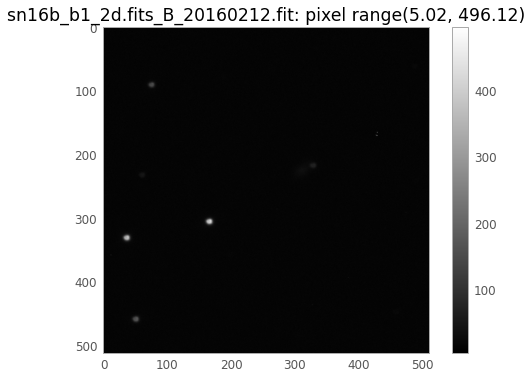

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


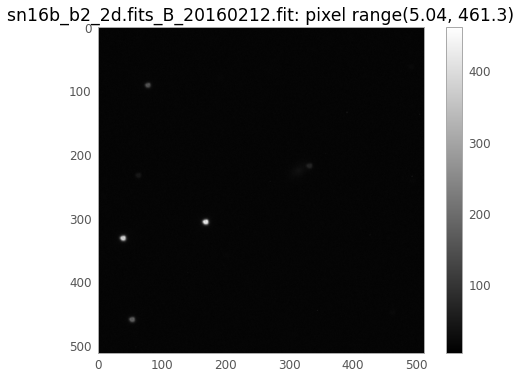

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


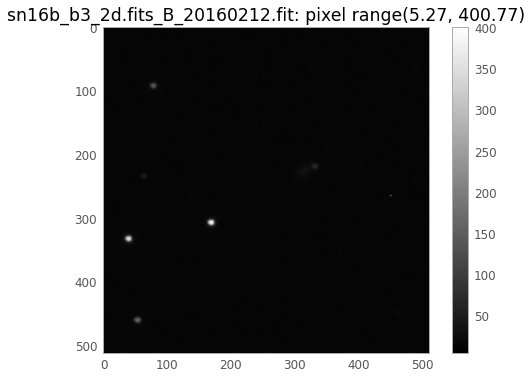

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


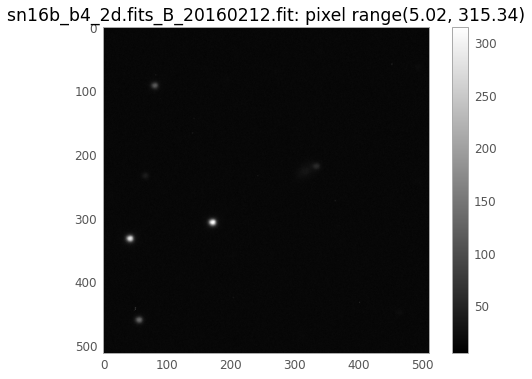

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


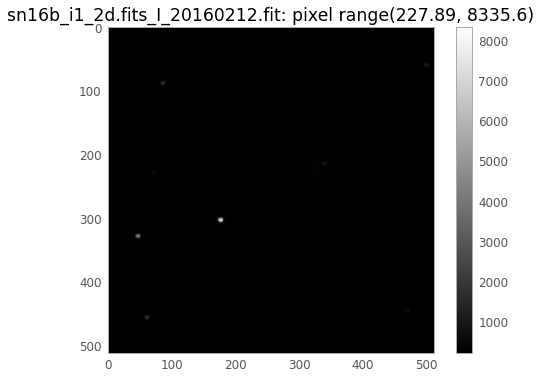

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


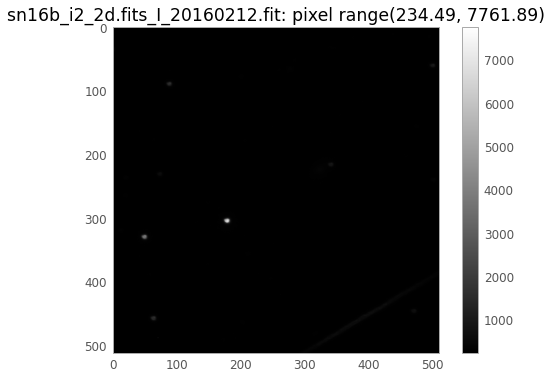

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


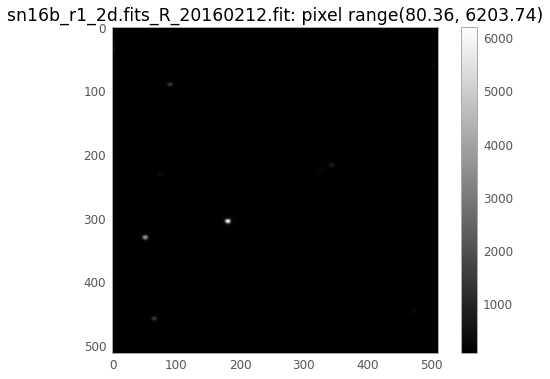

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


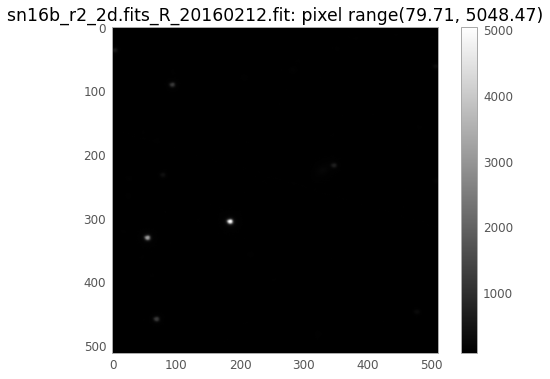

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


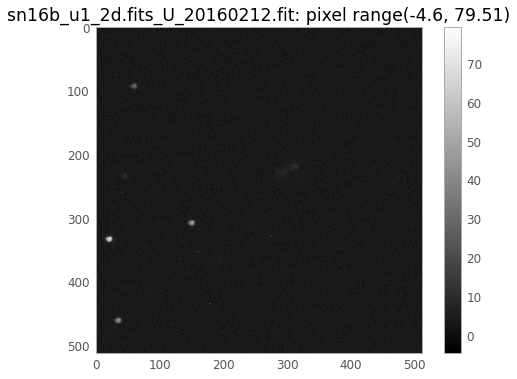

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


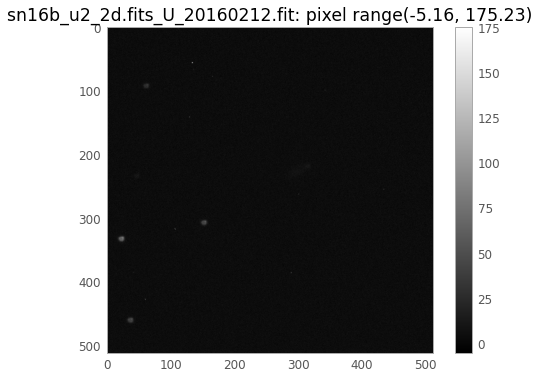

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


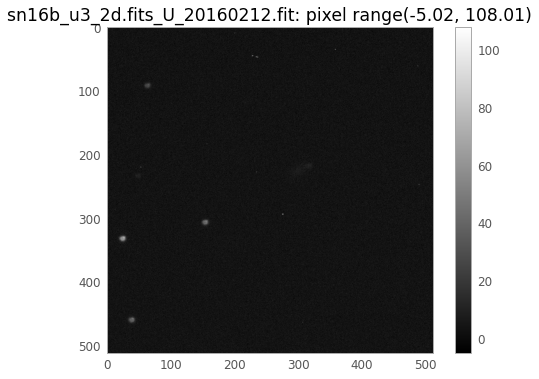

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


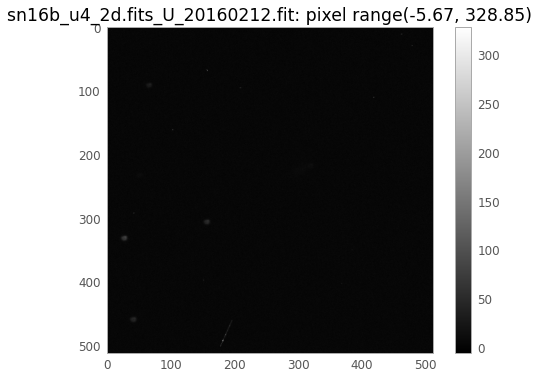

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


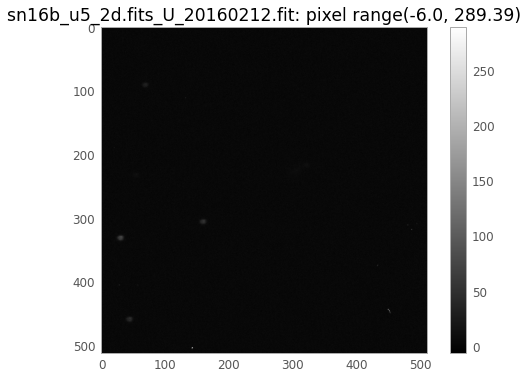

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


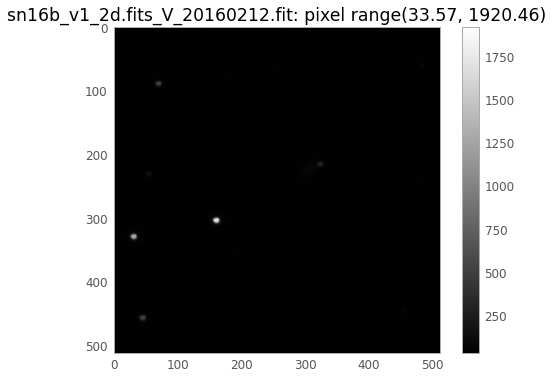

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


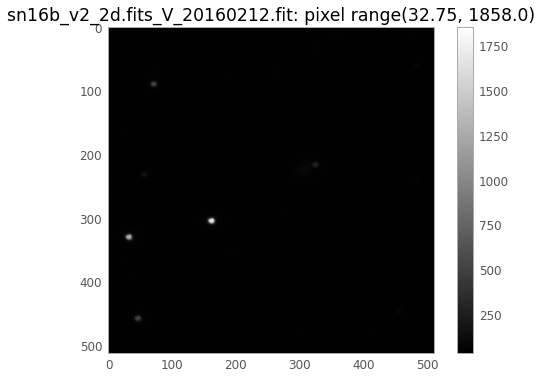

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


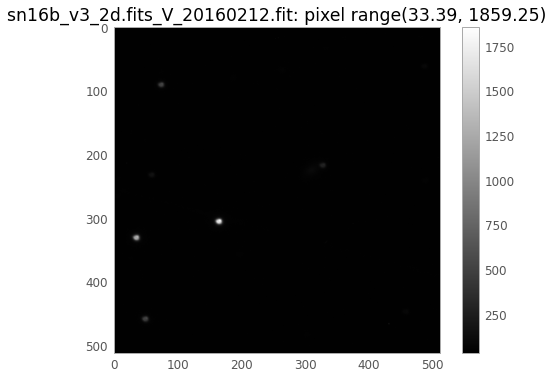

In [83]:
# Applying to images of objects of interest

science_files = []
for file in summary['file'].astype(str):
    if 'sn' in file:
        filter = file.split('_')[1][0]
        science_files.append([CCDData.read(os.path.join(files[i].location, file), unit='adu'), filter, file])


for data, filter, name in science_files:
    data = ccd.subtract_bias(data, combined_bias)

    file_name = os.path.join(path, 'combined_flat_filter_{}.fit'.format(filter))
    combined_flat = CCDData.read(file_name, unit='adu')

    data = ccd.flat_correct(data, combined_flat)

    name2 = os.path.join(output_path, name+'_'+filter.upper()+'_'+os.path.basename(files[i].location)+'.fit')
    
    min_pixel = np.round(data.data.min(), 2)
    max_pixel = np.round(data.data.max(), 2)

    # Save Output Files
    data.write(name2, overwrite=True)
    plt.grid(False)
    plt.imshow(data, cmap='gray')
    plt.colorbar()
    plt.title(os.path.basename(name2)+f': pixel range({min_pixel}, {max_pixel})')
    plt.show()

In [84]:
[['sn16b_b1_2d.fits_B_20160213.fit', 4.28, 697.36], ['sn16b_b2_2d.fits_B_20160213.fit', 4.64, 729.21], ['sn16b_b3_2d.fits_B_20160213.fit', 4.38, 668.15], ['sn16b_b4_2d.fits_B_20160213.fit', 4.99, 702.15], ['sn16b_i1_2d.fits_I_20160213.fit', 234.5, 8617.64], ['sn16b_i2_2d.fits_I_20160213.fit', 232.41, 8727.29], ['sn16b_r1_2d.fits_R_20160213.fit', 81.12, 8980.52], ['sn16b_r2_2d.fits_R_20160213.fit', 81.12, 8866.71], ['sn16b_u1_2d.fits_U_20160213.fit', -5.98, 262.29], ['sn16b_u2_2d.fits_U_20160213.fit', -5.02, 153.95], ['sn16b_u3_2d.fits_U_20160213.fit', -4.43, 240.58], ['sn16b_u4_2d.fits_U_20160213.fit', -4.75, 484.94], ['sn16b_u5_2d.fits_U_20160213.fit', -4.7, 160.08], ['sn16b_v1_2d.fits_V_20160213.fit', 33.08, 2876.87], ['sn16b_v2_2d.fits_V_20160213.fit', 33.42, 3635.79], ['sn16b_v3_2d.fits_V_20160213.fit', 33.59, 3500.64]]

[['sn16b_b1_2d.fits_B_20160213.fit', 4.28, 697.36],
 ['sn16b_b2_2d.fits_B_20160213.fit', 4.64, 729.21],
 ['sn16b_b3_2d.fits_B_20160213.fit', 4.38, 668.15],
 ['sn16b_b4_2d.fits_B_20160213.fit', 4.99, 702.15],
 ['sn16b_i1_2d.fits_I_20160213.fit', 234.5, 8617.64],
 ['sn16b_i2_2d.fits_I_20160213.fit', 232.41, 8727.29],
 ['sn16b_r1_2d.fits_R_20160213.fit', 81.12, 8980.52],
 ['sn16b_r2_2d.fits_R_20160213.fit', 81.12, 8866.71],
 ['sn16b_u1_2d.fits_U_20160213.fit', -5.98, 262.29],
 ['sn16b_u2_2d.fits_U_20160213.fit', -5.02, 153.95],
 ['sn16b_u3_2d.fits_U_20160213.fit', -4.43, 240.58],
 ['sn16b_u4_2d.fits_U_20160213.fit', -4.75, 484.94],
 ['sn16b_u5_2d.fits_U_20160213.fit', -4.7, 160.08],
 ['sn16b_v1_2d.fits_V_20160213.fit', 33.08, 2876.87],
 ['sn16b_v2_2d.fits_V_20160213.fit', 33.42, 3635.79],
 ['sn16b_v3_2d.fits_V_20160213.fit', 33.59, 3500.64]]

In [85]:
[['sn16b_b1_2d.fits_B_20160212.fit', 5.02, 496.12], ['sn16b_b2_2d.fits_B_20160212.fit', 5.04, 461.3], ['sn16b_b3_2d.fits_B_20160212.fit', 5.27, 400.77], ['sn16b_b4_2d.fits_B_20160212.fit', 5.02, 315.34], ['sn16b_i1_2d.fits_I_20160212.fit', 227.89, 8335.6], ['sn16b_i2_2d.fits_I_20160212.fit', 234.49, 7761.89], ['sn16b_r1_2d.fits_R_20160212.fit', 80.36, 6203.74], ['sn16b_r2_2d.fits_R_20160212.fit', 79.71, 5048.47], ['sn16b_u1_2d.fits_U_20160212.fit', -4.6, 79.51], ['sn16b_u2_2d.fits_U_20160212.fit', -5.16, 175.23], ['sn16b_u3_2d.fits_U_20160212.fit', -5.02, 108.01], ['sn16b_u4_2d.fits_U_20160212.fit', -5.67, 328.85], ['sn16b_u5_2d.fits_U_20160212.fit', -6.0, 289.39], ['sn16b_v1_2d.fits_V_20160212.fit', 33.57, 1920.46], ['sn16b_v2_2d.fits_V_20160212.fit', 32.75, 1858.0], ['sn16b_v3_2d.fits_V_20160212.fit', 33.39, 1859.25]]

[['sn16b_b1_2d.fits_B_20160212.fit', 5.02, 496.12],
 ['sn16b_b2_2d.fits_B_20160212.fit', 5.04, 461.3],
 ['sn16b_b3_2d.fits_B_20160212.fit', 5.27, 400.77],
 ['sn16b_b4_2d.fits_B_20160212.fit', 5.02, 315.34],
 ['sn16b_i1_2d.fits_I_20160212.fit', 227.89, 8335.6],
 ['sn16b_i2_2d.fits_I_20160212.fit', 234.49, 7761.89],
 ['sn16b_r1_2d.fits_R_20160212.fit', 80.36, 6203.74],
 ['sn16b_r2_2d.fits_R_20160212.fit', 79.71, 5048.47],
 ['sn16b_u1_2d.fits_U_20160212.fit', -4.6, 79.51],
 ['sn16b_u2_2d.fits_U_20160212.fit', -5.16, 175.23],
 ['sn16b_u3_2d.fits_U_20160212.fit', -5.02, 108.01],
 ['sn16b_u4_2d.fits_U_20160212.fit', -5.67, 328.85],
 ['sn16b_u5_2d.fits_U_20160212.fit', -6.0, 289.39],
 ['sn16b_v1_2d.fits_V_20160212.fit', 33.57, 1920.46],
 ['sn16b_v2_2d.fits_V_20160212.fit', 32.75, 1858.0],
 ['sn16b_v3_2d.fits_V_20160212.fit', 33.39, 1859.25]]